<a href="https://colab.research.google.com/github/Blackman9t/Python_-_Statistics_for_Financial_Analysis/blob/master/4_wk1_Build%2Ba%2Bsimple%2Btrading%2Bstrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a simple trading strategy 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##About The Data<br>
Index: The index is the date for each observation.<br>
Open: Is the opening price for this day.<br>
High: Is the highest price for this day<br>
Low: Is the lowest price for this day<br>
Close: Is the closing price for this day<br>
Adjust Close: Is a stock closing price on a given day of trading that has been adjusted to include:<br>
Any dispution and the corporate actions that occurred at any time before the next day's open.<br>
Volume: Is the amount of trade that occurred in a given date.

### 1. Munging the stock data and add two columns - MA10 and MA50

In [120]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.DataFrame.from_csv('https://raw.githubusercontent.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/master/facebook.csv')
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


### 2. Add "Shares" column to make decisions base on the strategy 

In [0]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

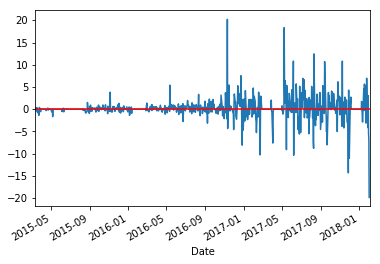

In [122]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [123]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

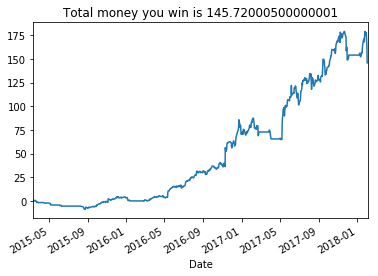

In [124]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).

### 1. Munging the stock data

In [125]:
#import MS's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
ms = pd.DataFrame.from_csv('https://raw.githubusercontent.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/master/microsoft.csv')
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606


### 2. Add shares column to make decisions based on the strategy

In [126]:
ms['Shares'] = [1 if ms.loc[ei, 'MA10']> ms.loc[ei, 'MA50'] else 0 for ei in ms.index]
ms.head(3)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034,0
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056,0
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044,0


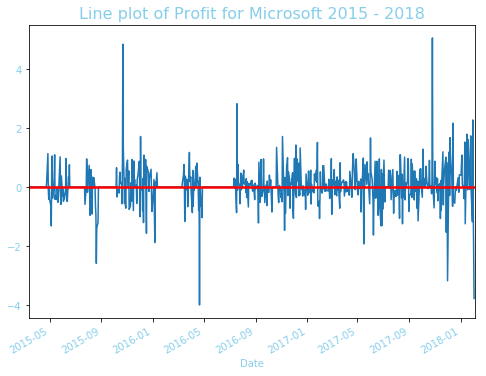

In [127]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)

ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index]
ms.Profit.plot(figsize=(8, 6))
plt.xticks(color='skyblue')
plt.yticks(color='skyblue')
plt.xlabel('Date', color='skyblue')
plt.title('Line plot of Profit for Microsoft 2015 - 2018', color='skyblue', fontsize=16)
plt.axhline(y=0, color='r', linewidth=2.5)
plt.show()

### Adding the same profit column as above, now named Profit2, using apply and lambda function... sweet!

In [0]:
ms['Profit2'] = ms.apply(lambda x: x['Close1'] - x['Close'] if x['Shares'] == 1 else 0, axis=1)

In [129]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Profit2
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,2.270004
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,-0.750000
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,-2.480003
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,-3.779999
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


###  kill notebook to free up space after use by running code cell below

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)